# Mobile Game A/B Testing Project

Cookie Cats is a hugely popular mobile puzzle game developed by Tactile Entertainment. It's a classic "connect three" style puzzle game where the player must connect tiles of the same color in order to clear the board and win the level. It also features singing cats. We're not kidding!

As players progress through the game they will encounter gates that force them to wait some time before they can progress or make an in-app purchase. In this project, we will analyze the result of an A/B test where the first gate in Cookie Cats was moved from level 30 to level 40. In particular, we will analyze the impact on player retention.

# Description

User Id - The unique number identify each user

Version - Whether the player was put into control group or test group.

Control Group - Gate - 30 ( A gate level at 30)
Test Group - Gate - 40 (A gate level at 40)

Sum_gamerounds - The number of game rounds played by the player during the first 14 days after installing the app.

Sum_gamerounds - Number of game rounds played by the player during the first week after installation.
retention_1 - Did the player come back and play 1 day after installing?
retention_7 - Did the player come back and play 7 day after installing?

After installing the game, the player assigned to either gate 30 or gate 40.


## Introduction of Dataset

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df = pd.read_excel("C:/Users/priya/Documents/cookie_cats.xlsx")
df

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


In [32]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


## Identify the Null Values 

In [33]:
df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

## Identify Duplicates

In [34]:
df.duplicated().sum()

0

## Outliers Identification

Summary Statistics:
Mean: 51.8724567297564
Median: 16.0
Standard Deviation: 195.05085754201596
Lower Threshold for Outliers: -64.0
Upper Threshold for Outliers: 120.0
Outliers:
        userid  version  sum_gamerounds  retention_1  retention_7
2          377  gate_40             165         True        False
4          488  gate_40             179         True         True
5          540  gate_40             187         True         True
9         1587  gate_40             153         True        False
14        2218  gate_30             305         True         True
...        ...      ...             ...          ...          ...
90121  9991145  gate_30             328         True         True
90125  9991408  gate_40             186         True         True
90134  9991949  gate_30             191         True         True
90150  9995412  gate_40             253         True         True
90160  9996269  gate_30             143        False        False

[10177 rows x 5 columns]


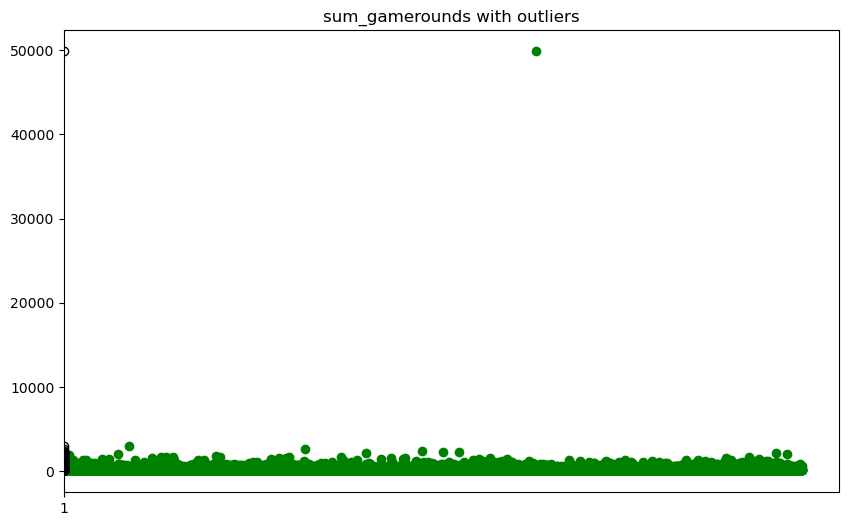

In [35]:
mean = df['sum_gamerounds'].mean()
median = df['sum_gamerounds'].median()
std_dev = df['sum_gamerounds'].std()

Q1 = df['sum_gamerounds'].quantile(0.25)
Q3 = df['sum_gamerounds'].quantile(0.75)
IQR = Q3 - Q1

lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR


outliers = df[(df['sum_gamerounds'] < lower_threshold) | (df['sum_gamerounds'] > upper_threshold)]

print("Summary Statistics:")
print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)
print("Lower Threshold for Outliers:", lower_threshold)
print("Upper Threshold for Outliers:", upper_threshold)
print("Outliers:")
print(outliers)

plt.figure(figsize = (10,6))
plt.boxplot("sum_gamerounds", data = df)
plt.title("sum_gamerounds with outliers")
plt.scatter(outliers.index, outliers['sum_gamerounds'], color='green', label='Outliers')
plt.show()


## Distribution of Gamerounds

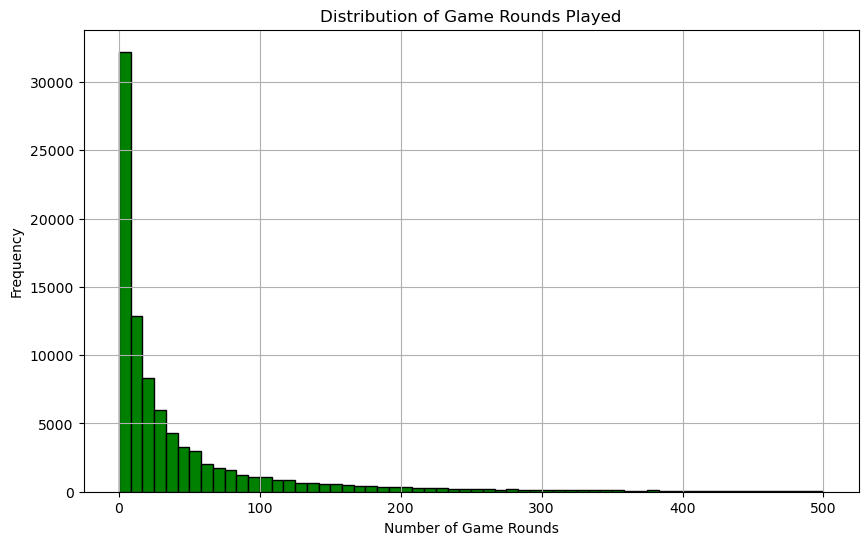

In [36]:
plt.figure(figsize=(10, 6))
plt.hist(df['sum_gamerounds'], bins=60, range=(0, 500), color='green', edgecolor='black')
plt.title('Distribution of Game Rounds Played')
plt.xlabel('Number of Game Rounds')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## sum_gamerounds without outliers

In [37]:
Q1 = df['sum_gamerounds'].quantile(0.25)
Q3 = df['sum_gamerounds'].quantile(0.75)
IQR = Q3 - Q1

df_without_outlier = df[
    (df['sum_gamerounds'] >= (Q1 - 1.5 * IQR)) &
    (df['sum_gamerounds'] <= (Q3 + 1.5 * IQR))
]


<Axes: >

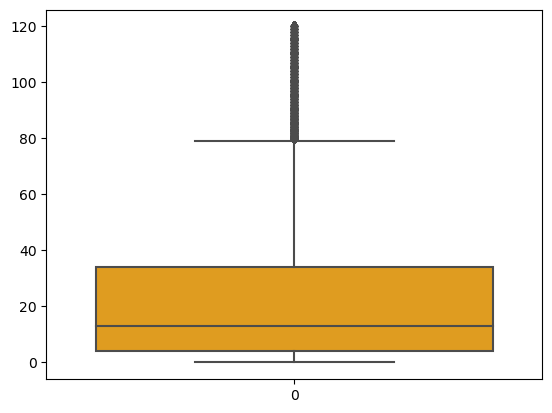

In [38]:
sns.boxplot(df_without_outlier['sum_gamerounds'], palette= ['orange'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [40]:
df.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


## Count the number of players in each Control Group and Test Group

In [41]:
df.groupby(['version','userid']).count()

sum_gamerounds  retention_1  retention_7
version userid                                           
gate_30 116                   1            1            1
        337                   1            1            1
        1066                  1            1            1
        2101                  1            1            1
        2179                  1            1            1
...                         ...          ...          ...
gate_40 9998733               1            1            1
        9999441               1            1            1
        9999479               1            1            1
        9999768               1            1            1
        9999861               1            1            1

[90189 rows x 3 columns]

## Count Players by Versions

In [42]:
count_by_version = df.groupby('version')['userid'].count()

In [43]:
count_by_version

version
gate_30    44700
gate_40    45489
Name: userid, dtype: int64

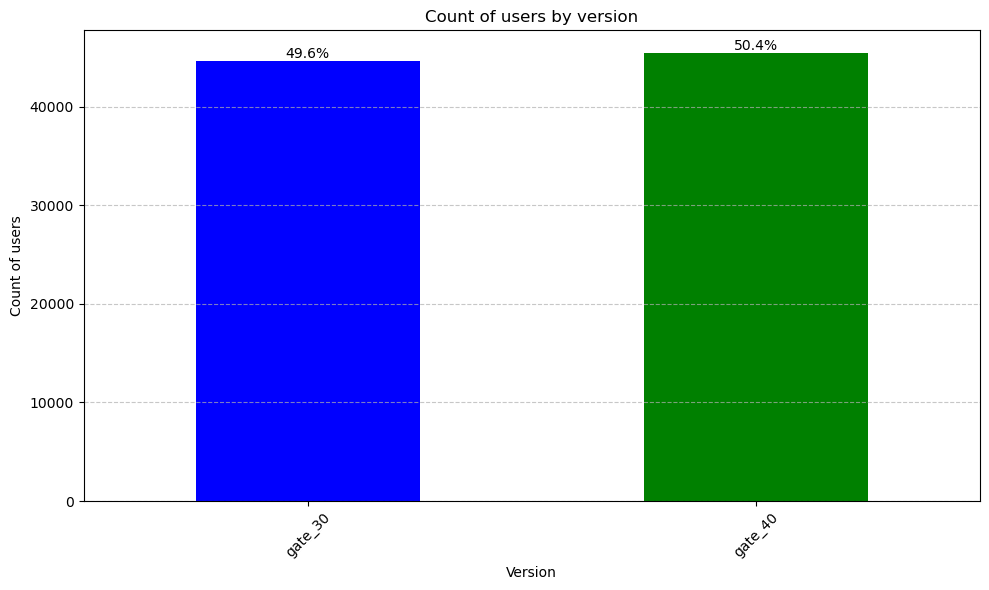

In [44]:
total_users = count_by_version.sum()

plt.figure(figsize=(10, 6))
count_by_version.plot(kind='bar', color= ['blue','green'])
plt.title('Count of users by version')
plt.xlabel('Version')
plt.ylabel('Count of users')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

for idx, value in enumerate(count_by_version):
    percentage = '{:.1f}%'.format(100 * value / total_users)
    plt.text(idx, value + 0.5, percentage, ha='center', va='bottom', color='black')
    
plt.tight_layout()
plt.show()

##  Average Number of Gamerounds played in Control & Test Group

In [45]:
avg_game_rounds_by_version = df.groupby('version')['sum_gamerounds'].mean().reset_index()


In [46]:
avg_game_rounds_by_version

,version,sum_gamerounds
0,gate_30,52.456264
1,gate_40,51.298776


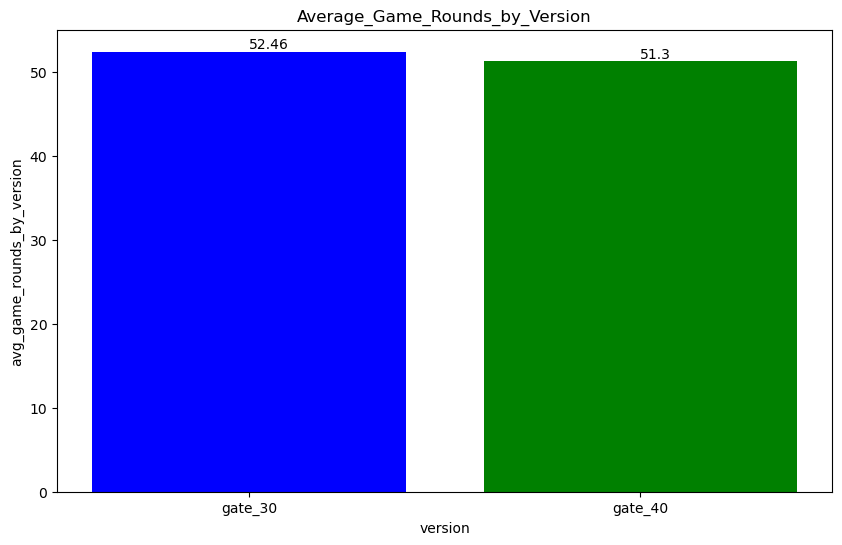

In [47]:
plt.figure(figsize = (10,6))
plt.bar(avg_game_rounds_by_version['version'],avg_game_rounds_by_version['sum_gamerounds'], color = ['blue','green'])
plt.title('Average_Game_Rounds_by_Version')
plt.xlabel('version')
plt.ylabel('avg_game_rounds_by_version')

for idx, bar in enumerate(plt.gca().patches):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2), va='bottom')

plt.show()


## correlation between sum_gamerounds and Retantion (Heatmap)

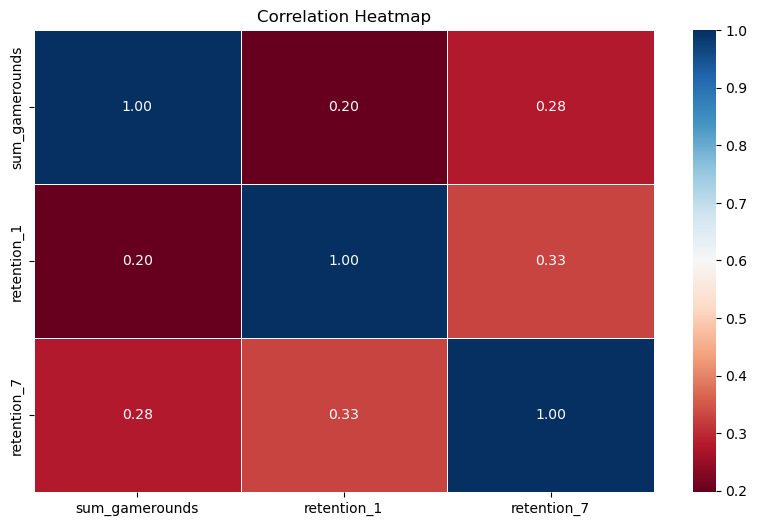

In [48]:
df['retention_1_level'] = df['retention_1'].astype(int)
df['retention_7_level'] = df['retention_7'].astype(int)

correlation_matrix = df[['sum_gamerounds', 'retention_1', 'retention_7']].corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt = '.2f', linewidths = 0.5)
plt.title('Correlation Heatmap')
plt.show()

##  Conversion Rate of 1_Day Retention and 7_Day Retention

In [49]:
retention_1_rate = df['retention_1'].sum()/df['retention_1'].count()*100
retention_1_rate_with_percent = f"{retention_1_rate:.2f}%"
print(retention_1_rate_with_percent)

44.52%


In [50]:
retention_7_rate = df['retention_7'].sum()/df['retention_7'].count()*100
retention_7_rate_with_percent = f"{retention_7_rate:.2f}%"
print(retention_7_rate_with_percent)

18.61%


## Conversion Rate with retention_1 & retention_7 by version

In [51]:
conversion_rate_retention_1_by_version = df.groupby(['version'])['retention_1'].mean() * 100
conversion_rate_retention_7_by_version = df.groupby(['version'])['retention_7'].mean() * 100


print(conversion_rate_retention_1_by_version)
print(conversion_rate_retention_7_by_version)


version
gate_30    44.818792
gate_40    44.228275
Name: retention_1, dtype: float64
version
gate_30    19.020134
gate_40    18.200004
Name: retention_7, dtype: float64


C:\Users\priya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

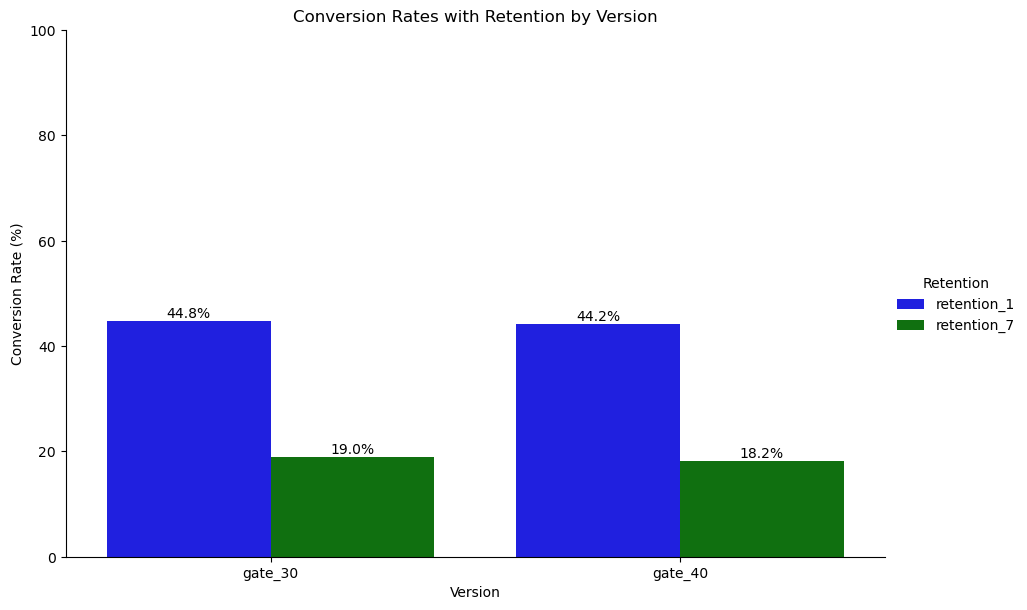

In [52]:
conversion_rates = df.groupby('version')[['retention_1', 'retention_7']].mean() * 100

conversion_rates.reset_index(inplace=True)

conversion_rates_melted = pd.melt(conversion_rates, id_vars=['version'], value_vars=['retention_1', 'retention_7'],
                                  var_name='Retention', value_name='Conversion Rate (%)')

# Visualization
plt.figure(figsize=(10, 6))
sns.catplot(data=conversion_rates_melted, kind='bar', x='version', y='Conversion Rate (%)', hue='Retention', 
            palette={"retention_1": "blue", "retention_7": "green"}, height=6, aspect=1.5)
plt.title('Conversion Rates with Retention by Version')
plt.xlabel('Version')
plt.ylabel('Conversion Rate (%)')
plt.ylim(0, 100)

# Add percentage labels to each bar
for bar in plt.gca().patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', 
             ha='center', va='bottom', fontsize=10, color='black')

plt.show()


## Conversion Rate of Player's Behavior by Version

In [53]:
# Count the number of users who played the game on day 1 but quit by day 7
played_day1_quit_day7 = df[(df['retention_1'] == True) & (df['retention_7'] == False)].shape[0]

played_day1_total = df[df['retention_1'] == True].shape[0]

# Calculate the rate of people who only played the game on day 1 and quit by day 7
quit_rate = played_day1_quit_day7 / played_day1_total

print("Rate of people who only played the game on the first day and quit by day 7:", quit_rate)

Rate of people who only played the game on the first day and quit by day 7: 0.6717057255995816


In [54]:
# Count the number of users who did not play the game on both day 1 and day 7
not_played_at_all = df[(df['retention_1'] == False) & (df['retention_7'] == False)].shape[0]
total_users = df.shape[0]

# Calculate the rate of people who did not play the game at all
not_played_rate = not_played_at_all / total_users

print("Rate of people who did not play the game at all after installing it:", not_played_rate)

Rate of people who did not play the game at all after installing it: 0.5148854073113129


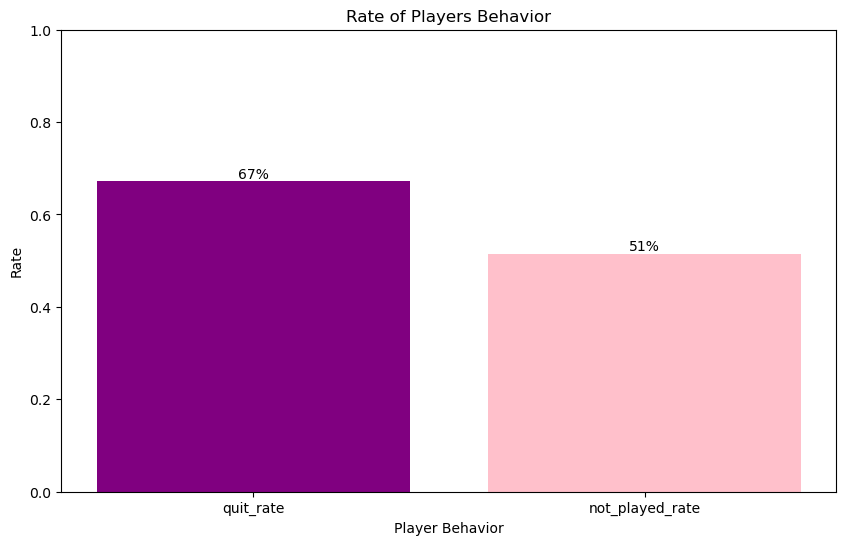

In [55]:
quit_rate_percentage = quit_rate * 100
not_played_rate_percentage = not_played_rate * 100

plt.figure(figsize=(10, 6))
bars = plt.bar(['quit_rate', 'not_played_rate'], [quit_rate, not_played_rate], color=['purple', 'pink'])
plt.title('Rate of Players Behavior')
plt.xlabel('Player Behavior')
plt.ylabel('Rate')
plt.ylim(0, 1)

# Add percentages 
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.0%}', va='bottom', ha='center')

plt.show()

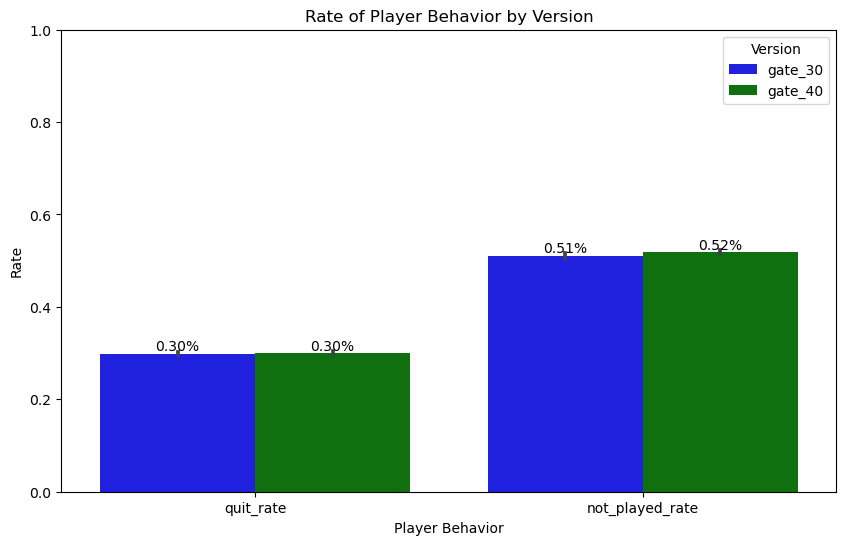

In [66]:
version_counts = df['version'].value_counts()

played_day1_quit_day7 = df[(df['retention_1'] == True) & (df['retention_7'] == False)].shape[0]
total_users = df[df['retention_1'] == True].shape[0]
quit_rate = played_day1_quit_day7 / played_day1_total

not_played_at_all = df[(df['retention_1'] == False) & (df['retention_7'] == False)].shape[0]
total_users = df.shape[0]
not_played_rate = not_played_at_all / total_users

df['quit_rate'] = (df['retention_1'] & ~df['retention_7']).astype(int)
df['not_played_rate'] = (~df['retention_1'] & ~df['retention_7']).astype(int)

melted_df = df.melt(id_vars=['version'], value_vars=['quit_rate', 'not_played_rate'],
                    var_name='Player Behavior', value_name='Rate')
melted_df['Percentage'] = melted_df.apply(lambda x: (x['Rate'] / version_counts[x['version']]) * 100, axis=1)


plt.figure(figsize=(10, 6))
sns.barplot(data=melted_df, x='Player Behavior', y='Rate', hue='version', palette=['blue', 'green'])

for p in plt.gca().patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.gca().annotate(f'{y:.2f}%', (x, y), ha='center', va='bottom')

plt.title('Rate of Player Behavior by Version')
plt.xlabel('Player Behavior')
plt.ylabel('Rate')
plt.ylim(0, 1)
plt.legend(title='Version')
plt.show()

## Relationship between sum_gamerounds and Retention

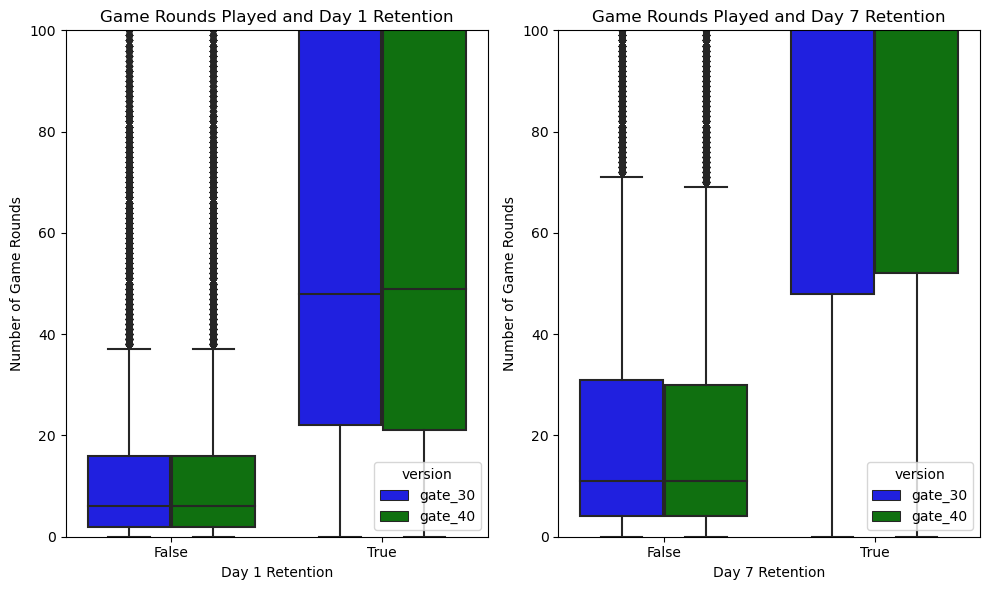

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Box plot for retention_1 with version

sns.boxplot(x='retention_1', y='sum_gamerounds',hue='version', data=df, ax=axes[0], palette=['blue', 'green'])
axes[0].set_title('Game Rounds Played and Day 1 Retention')
axes[0].set_xlabel('Day 1 Retention')
axes[0].set_ylabel('Number of Game Rounds')
axes[0].set_ylim(0, 100)

# Box plot for retention_7 with version

sns.boxplot(x='retention_7', y='sum_gamerounds', hue='version', data=df, ax=axes[1], palette=['blue', 'green'])
axes[1].set_title('Game Rounds Played and Day 7 Retention')
axes[1].set_xlabel('Day 7 Retention')
axes[1].set_ylabel('Number of Game Rounds')
axes[1].set_ylim(0, 100)

plt.tight_layout()
plt.show()

## Normality Check through Shapiro Wilk Test

## Define Hypothesis for Normality Testing

In [58]:
## Define Hypothesis

## H0 = if p value is grater than 0.05 then normal distribution is assumed
## Ha = if p value is less than 0.05 then normal distribution is not assumed

In [59]:
from scipy.stats import shapiro

# Define a function to perform Shapiro-Wilk test
def shapiro_test(data):
    stat, p = shapiro(data)
    return stat, p

shapiro_results = df.groupby('version')['sum_gamerounds'].apply(shapiro_test)


for version, (stat, p) in shapiro_results.items():
    print(f"Shapiro-Wilk Test for {version}:")
    print("Test Statistic:", stat)
    print("p-value:", p)

# Define Hypothesis
    alpha = 0.05
    if p > alpha:
        print("Normal distribution is assumed (fail to reject H0)")
    else:
        print("Normal distribution is not assumed (reject H0)")


Shapiro-Wilk Test for gate_30:
Test Statistic: 0.08805108070373535
p-value: 0.0
Normal distribution is not assumed (reject H0)
Shapiro-Wilk Test for gate_40:
Test Statistic: 0.48256635665893555
p-value: 0.0
Normal distribution is not assumed (reject H0)


C:\Users\priya\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## As per the above Normality Check, we observed that p value is less than 0.05 that means Normal distribution is not assumed so I need to move forward with Non Parametric Tests

## Implementation of Chi-square Test

## Contingency Table

In [60]:
from scipy.stats import chi2_contingency

In [61]:
contingency_table = pd.crosstab(df['version'], [df['retention_1'], df['retention_7']], rownames=['version'], colnames=['retention_1', 'retention_7'])
print(contingency_table)
       

retention_1  False        True       
retention_7  False True   False True 
version                              
gate_30      22840  1826  13358  6676
gate_40      23597  1773  13613  6506


In [62]:

contingency_table = pd.crosstab(df['version'], df['retention_1'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p_value}")


Chi-Square Test Results:
Chi-Square Statistic: 3.1591007878782262
P-value: 0.07550476210309086


In [63]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['version'], df['retention_7'])

print("Contingency Table:")
print(contingency_table)


Contingency Table:
retention_7  False  True 
version                  
gate_30      36198   8502
gate_40      37210   8279


In [64]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p_value}")


Chi-Square Test Results:
Chi-Square Statistic: 9.959086799559167
P-value: 0.0016005742679058301


## Mann-Whitney U Test

In [65]:
from scipy.stats import mannwhitneyu

data_gate_30 = df.loc[df['version'] == 'gate_30', 'sum_gamerounds']
data_gate_40 = df.loc[df['version'] == 'gate_40', 'sum_gamerounds']

stat, p = mannwhitneyu(data_gate_30, data_gate_40)

print("Mann-Whitney U Test:")
print("Test Statistic:", stat)
print("p-value:", p)

alpha = 0.05

# Define Hypothesis
if p > alpha:
    print("No significant difference between the groups (fail to reject H0)")
else:
    print("There is a significant difference between the groups (reject H0)")


Mann-Whitney U Test:
Test Statistic: 1024331250.5
p-value: 0.05020880772044255
No significant difference between the groups (fail to reject H0)


## Conclusion

## Conversion Rate:

## It can be observed from the conversion rate that there is no significant diffference between Control Group (Gate 30) and Test group (Gate 40).

## Final Results and Interpretation

## The results of the Chi-square test indicate that there is no statistically significant difference in the 1-day retention rate between the Control Group (gate_30) and Test Group (gate_40) (p-value = 0.0744). This suggests that both versions perform similarly in terms of short-term retention. However, for the 7-day retention rate, there is a statistically significant difference between the two groups (p-value = 0.0016). Furthermore, the gate_30 version exhibits a higher long-term retention rate compared to the gate_40 version.







## Utilizing the Mann-Whitney U Test as a non-parametric analysis, the obtained result of 0.0502 indicates that there is no statistically significant difference between the control and test groups. Consequently, the test fails to reject the null hypothesis